In [53]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import os
import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ilha/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# BINOMIAL - INSTRUCTIONS for assignment

with the binomial distribution I can change n*p. larger n*p will make the distribution look more "normal" (i.e. Gaussian). 
In a loop test that the binomial tends to a normal distribution as you increase the value of n*p.

## KS Test
Null Hypothesis: Binomial distribution is the same a normal distribution. 

Alternative Hypothesis: Binomial distribution is different from the normal distribution.

## AD Test
Null Hypothesis: Binomial data is within the threshold of the normal distribution.

Alternative Hypothesis: Binomial data is not within the threshold of the normal distribution.

In [54]:
narray = sorted(np.random.randint(10, 500,100))
ks_s_b=np.zeros(len(narray))
ks_p_b=np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
print(narray)

[29, 30, 37, 40, 41, 46, 51, 53, 60, 61, 65, 70, 71, 84, 86, 96, 102, 107, 108, 111, 116, 118, 127, 128, 131, 139, 139, 141, 147, 149, 153, 166, 173, 177, 179, 187, 187, 189, 191, 194, 195, 198, 203, 203, 213, 214, 215, 217, 217, 219, 221, 222, 236, 239, 246, 246, 247, 257, 257, 258, 260, 260, 266, 266, 269, 270, 273, 276, 280, 287, 299, 315, 320, 327, 338, 343, 344, 345, 354, 354, 357, 358, 359, 366, 375, 376, 376, 380, 391, 392, 393, 405, 412, 422, 440, 455, 459, 487, 487, 495]


In [55]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    #pl.plot(bincenters,np.histogram(dist, bins=mybins)[0]  / 1000., 'k')
    #pl.plot(bincenters, scipy.stats.norm.pdf(bincenters), 'r')
    #pl.show()

You want to see how the p-value (or the test statistics) behaves as a function of increasing n*p.
So you can plot the p-value (or the test statistics) against the n*p

think about how the captions are written in the paper  you have to read for last week assignment: a caption must describe the plot sufficiently well that I do not need to read the paper to understand it. 

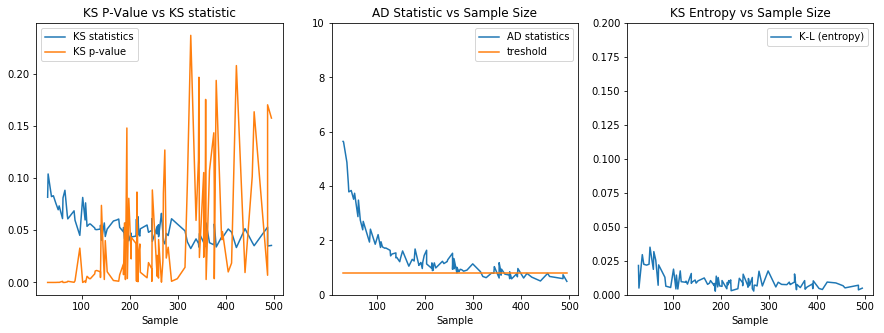

In [56]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()
plt.title('KS P-Value vs KS statistic')
plt.xlabel('Sample')

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()
plt.title('AD Statistic vs Sample Size')
plt.xlabel('Sample')

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.ylim(0,0.2)
pl.legend()
plt.title('KS Entropy vs Sample Size')
plt.xlabel('Sample')

## Caption:
In the first figure, since the KS statistics is declinining it is less to be a normal distribution as means reach alpha.

In the second figure, the AD statistics shows that it is declining below the threshold as sample size increases.

# POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution

## KS Test
Null Hypothesis: Poisson distribution is the same a normal distribution. 

Alternative Hypothesis: Poisson distribution is different from the normal distribution.

## AD Test
Null Hypothesis: Poisson data is within the threshold of the normal distribution.

Alternative Hypothesis: BPoisson data is not within the threshold of the normal distribution.

In [57]:
narray = np.linspace(1,500,100)
ks_s_p = np.zeros(len(narray))
ks_p_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
print(narray)

[   1.            6.04040404   11.08080808   16.12121212   21.16161616
   26.2020202    31.24242424   36.28282828   41.32323232   46.36363636
   51.4040404    56.44444444   61.48484848   66.52525253   71.56565657
   76.60606061   81.64646465   86.68686869   91.72727273   96.76767677
  101.80808081  106.84848485  111.88888889  116.92929293  121.96969697
  127.01010101  132.05050505  137.09090909  142.13131313  147.17171717
  152.21212121  157.25252525  162.29292929  167.33333333  172.37373737
  177.41414141  182.45454545  187.49494949  192.53535354  197.57575758
  202.61616162  207.65656566  212.6969697   217.73737374  222.77777778
  227.81818182  232.85858586  237.8989899   242.93939394  247.97979798
  253.02020202  258.06060606  263.1010101   268.14141414  273.18181818
  278.22222222  283.26262626  288.3030303   293.34343434  298.38383838
  303.42424242  308.46464646  313.50505051  318.54545455  323.58585859
  328.62626263  333.66666667  338.70707071  343.74747475  348.78787879
  353.

In [58]:
np.random.seed(999)

for i,n in enumerate(narray):
    # generating distribution with 1000 values
    dist = (np.random.poisson(lam=n, size=1000) - n) / np.sqrt(n)
    
    # run tests
    ks_s_p[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist,'norm')[1]
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    kl_p [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0],\
                                    scipy.stats.norm.pdf(bincenters) + n)

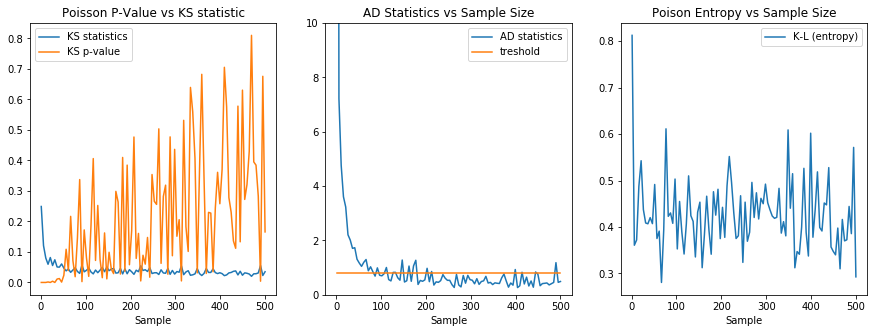

In [59]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.legend()
plt.title('Poisson P-Value vs KS statistic')
plt.xlabel('Sample')

fig.add_subplot(132)
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()
plt.title('AD Statistics vs Sample Size')
plt.xlabel('Sample')

fig.add_subplot(133)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.legend()
plt.title('Poison Entropy vs Sample Size')
plt.xlabel('Sample')

## Caption:

Both KS and AD statistics show that the Poisson distribution is within that of the normal distribution, yet the entroppy still seems ambiguous. 

### NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

/home/ilha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/home/ilha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


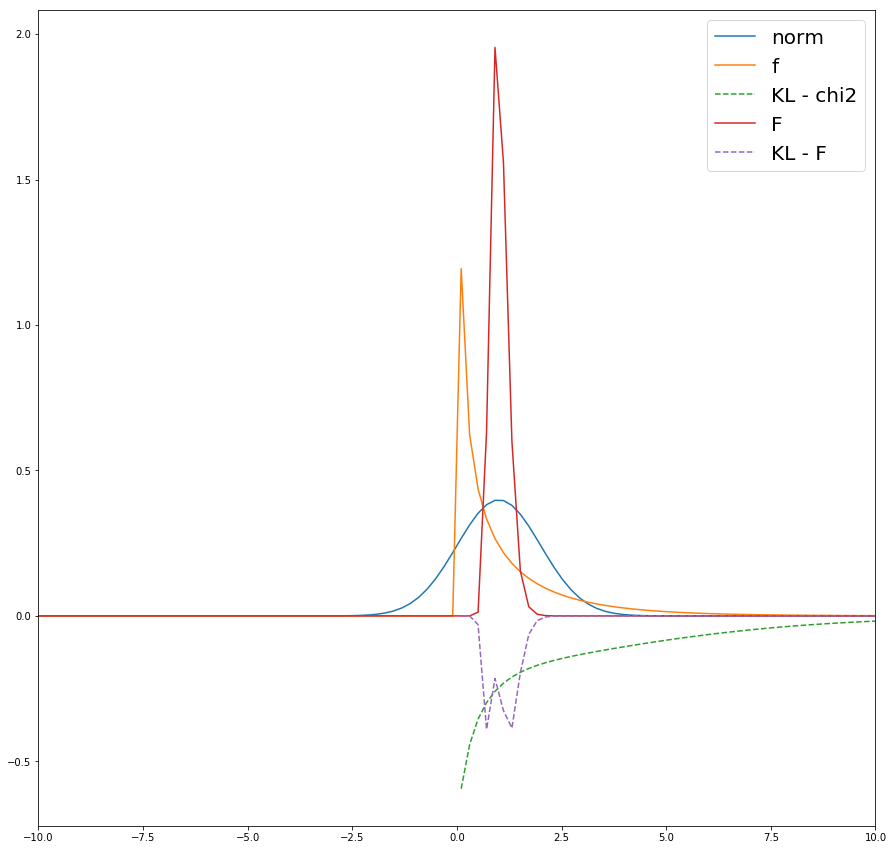

In [60]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x, 100, 100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);